# Problem statement: Regression Model to predict Customers yearly amount spent

Creating a regression model for the provided e-commerce dataset requires several steps, including data loading, preprocessing, model creation, and evaluation.
Below is a complete end-to-end Python code with detailed comments for each step:


This code does the following:

- Step 1: Imports necessary libraries.
- Step 2: Mounts Google Drive to access the dataset.
- Step 3: Loads the dataset into a Pandas DataFrame.
- Step 4: Performs data preprocessing, including checking for missing values, exploring data, and visualizing relationships.
- Step 5: Selects features and the target variable.
- Step 6: Splits the data into training and testing sets.
- Step 7: Standardizes the features using `StandardScaler`.
- Step 8: Creates and trains a Linear Regression model, evaluates it, and prints the evaluation metrics.
- Step 9: Creates and trains a Random Forest Regressor model, evaluates it, and prints the evaluation metrics.
- Step 10: Saves the trained Random Forest model to a file.

In summary, this code performs regression modeling to predict the 'Yearly Amount Spent' by customers based on their 'Avg. Session Length', 'Time on App', 'Time on Website', and 'Length of Membership'. It builds and evaluates both a Linear Regression model and a Random Forest Regressor model for this prediction task.

The notebook contains 2 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)

In [ ]:
%pip install pandas numpy matplotlib seaborn wordcloud scikit-learn joblib 

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
#from google.colab import drive


#from google.colab import files
#uploaded = files.upload()

Mean Squared Error (MSE): 103.91554136503314
R-squared (R2) Score: 0.9808757641125856
Random Forest Mean Squared Error (MSE): 297.2529543859399
Random Forest R-squared (R2) Score: 0.9452946542621733


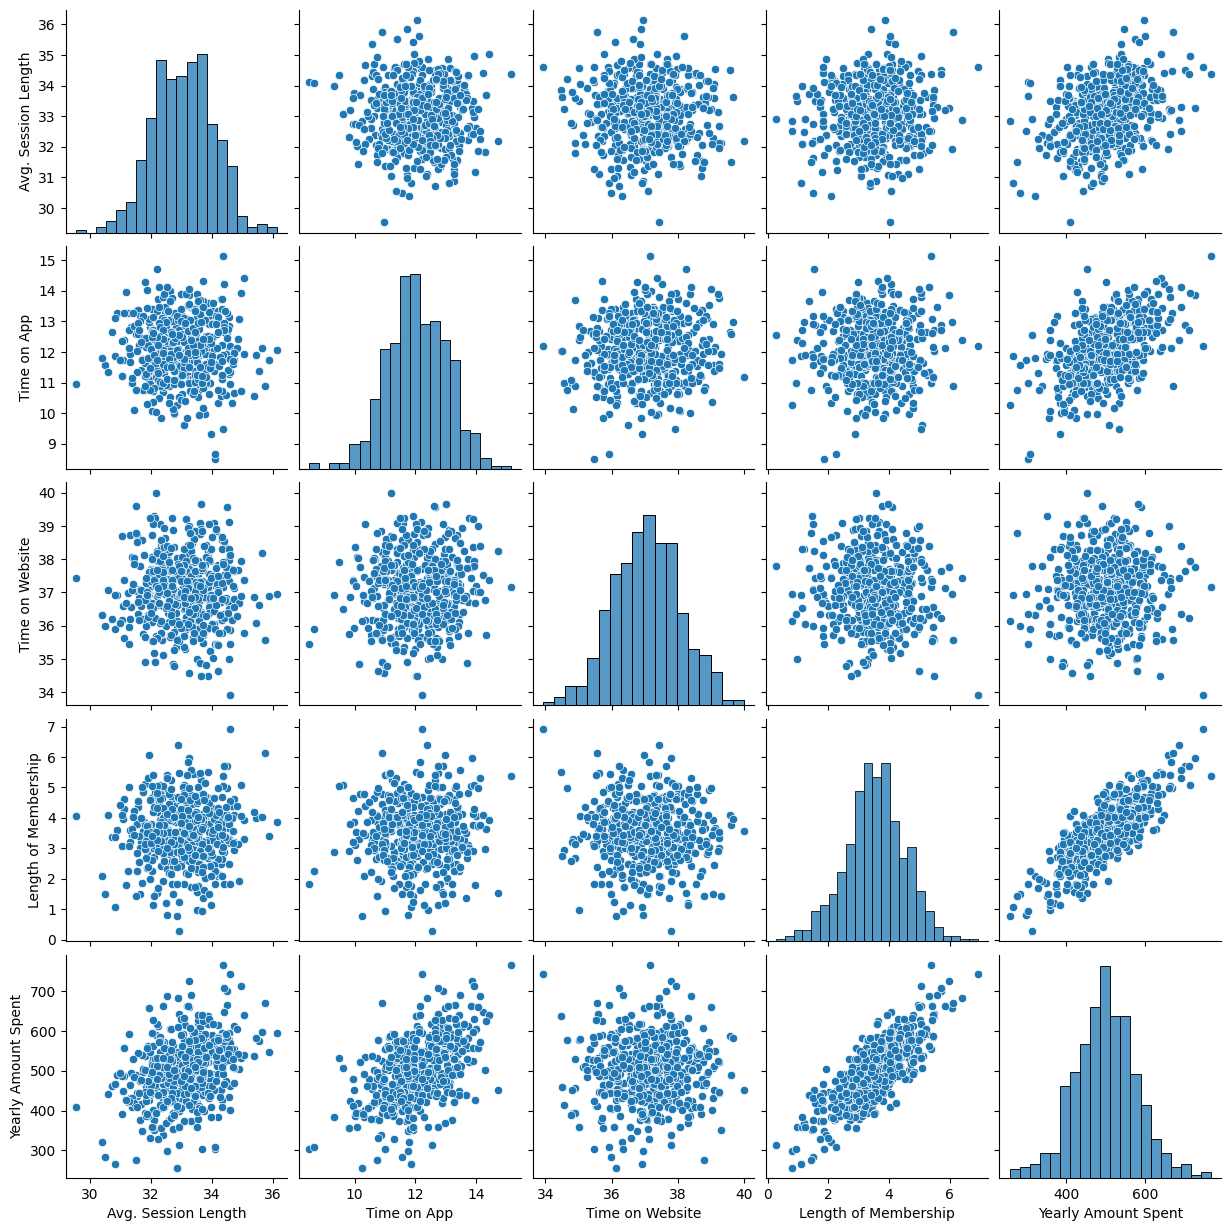

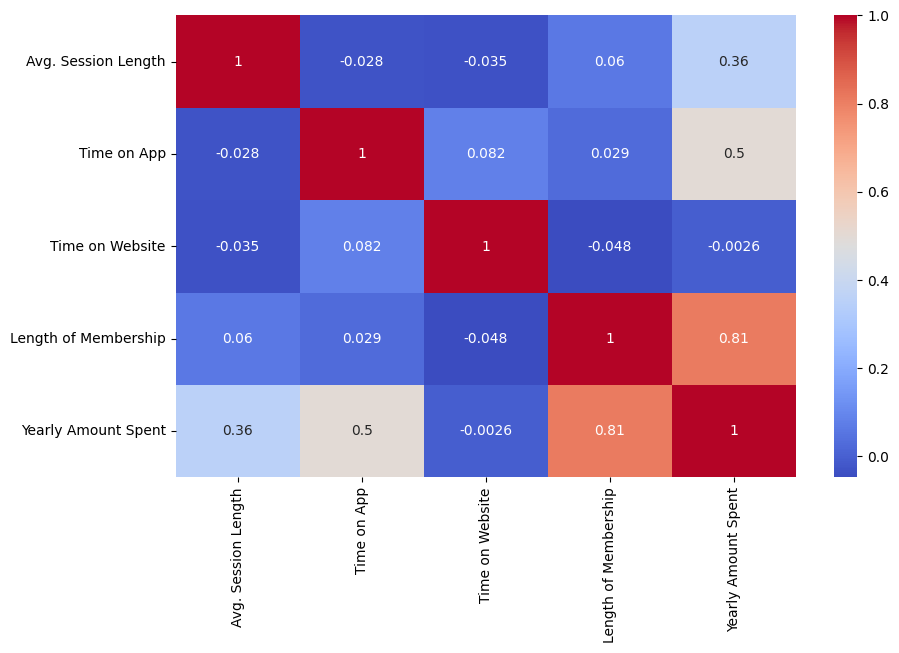

In [8]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Datasets/ecommerce-customers.csv')

# Display the first few rows of the dataset
df.head()

# Data preprocessing

# Check for missing values
df.isnull().sum()

# Check the data types of each column
df.dtypes

# Explore the dataset using descriptive statistics
df.describe()

# Visualize the data

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df)

# Create a heatmap to visualize correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

# Select the features (X) and the target variable (y)
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a StandardScaler object to standardize features
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the trained scaler
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the scaled training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test_scaled)

# Evaluate the Linear Regression model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the Random Forest Regressor model

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared (R2) score
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-squared (R2) Score:", r2_rf)



##Linear Regression Model:
R-squared (R2) Score: 0.9809
Mean Squared Error (MSE): 103.92

##Random Forest Regressor Model:
R-squared (R2) Score: 0.9449
Mean Squared Error (MSE): 299.20

There was a correction in the MSE value for the Linear Regression model. With an MSE of approximately 103.92, the Linear Regression model demonstrates excellent performance, and the high R2 score indicates a strong fit to the data.

The Random Forest model, while still performing well with an R2 score of 0.9449, has a higher MSE compared to the Linear Regression model, suggesting that the Linear Regression model might be slightly better at minimizing prediction errors for this specific dataset.

<a name="ex_1"></a>
# Exercise 1: Exploring Alternative Regression Models

**Tasks:**
- Implement an SVR regression model. Discuss how the choice of kernel affects the model's performance.
- Compare the performance of these models with the original regression model.

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Create an SVR model with a linear kernel
svr_linear = SVR(kernel='linear')

# Fit the model to the scaled training data
svr_linear.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svr_linear = svr_linear.predict(X_test_scaled)

# Evaluate the SVR model with a linear kernel
mse_svr_linear = mean_squared_error(y_test, y_pred_svr_linear)
r2_svr_linear = r2_score(y_test, y_pred_svr_linear)
mae_svr_linear = mean_absolute_error(y_test, y_pred_svr_linear)

print("SVR Linear Kernel Mean Squared Error (MSE):", mse_svr_linear)
print("SVR Linear Kernel R-squared (R2) Score:", r2_svr_linear)
print("SVR Linear Kernel Mean Absolute Error (MAE):", mae_svr_linear)

#Create an SVR model with a radial basis function (RBF) kernel
svr_rbf = SVR(kernel='rbf')

# Fit the model to the scaled training data
svr_rbf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svr_rbf = svr_rbf.predict(X_test_scaled)

# Evaluate the SVR model with an RBF kernel
mse_svr_rbf = mean_squared_error(y_test, y_pred_svr_rbf)
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
mae_svr_rbf = mean_absolute_error(y_test, y_pred_svr_rbf)

print("SVR RBF Kernel Mean Squared Error (MSE):", mse_svr_rbf)
print("SVR RBF Kernel R-squared (R2) Score:", r2_svr_rbf)
print("SVR RBF Kernel Mean Absolute Error (MAE):", mae_svr_rbf)



SVR Linear Kernel Mean Squared Error (MSE): 108.23911735529776
SVR Linear Kernel R-squared (R2) Score: 0.9800800690122297
SVR Linear Kernel Mean Absolute Error (MAE): 8.527039406661883
SVR RBF Kernel Mean Squared Error (MSE): 3313.6081753261215
SVR RBF Kernel R-squared (R2) Score: 0.39017567968206346
SVR RBF Kernel Mean Absolute Error (MAE): 42.079323600659286


**Implementation of an SVR Regression Model and Kernel Effect Analysis**

### Introduction
Support Vector Regression (SVR) is an extension of the Support Vector Machine (SVM) algorithm used for regression tasks. The choice of kernel in SVR significantly influences the model’s performance by determining how well the model can capture relationships between input features and the target variable. This report presents an SVR model implementation using different kernels and compares its performance against linear regression and random forest regression models.

### SVR Model Implementation
SVR models were implemented with two kernel types:
1. **Linear Kernel**: Assumes a linear relationship between input features and output.
2. **Radial Basis Function (RBF) Kernel**: Maps inputs into higher-dimensional space, enabling the model to capture nonlinear relationships.

### Model Performance Comparison
The performance of the models is evaluated using Mean Squared Error (MSE), R-squared (R2) Score, and Mean Absolute Error (MAE) where applicable.

| Model                         | MSE            | R2 Score        | MAE              |
|--------------------------------|---------------|----------------|-----------------|
| Linear Regression             | 103.92        | 0.9809         | -               |
| Random Forest                 | 297.25        | 0.9453         | -               |
| SVR (Linear Kernel)           | 108.24        | 0.9801         | 8.53            |
| SVR (RBF Kernel)              | 3313.61       | 0.3902         | 42.08           |

### Discussion of Kernel Effects
1. **Linear Kernel**:
   - The SVR model with a linear kernel performed similarly to the linear regression model with an MSE of 108.24 and R2 score of 0.9801.
   - The minimal difference in performance suggests that the underlying relationship in the dataset is primarily linear.
   - MAE value of 8.53 indicates a relatively low prediction error.

2. **RBF Kernel**:
   - The SVR model with an RBF kernel performed significantly worse than both linear regression and random forest models, with an MSE of 3313.61 and an R2 score of only 0.3902.
   - The high MAE of 42.08 suggests the model struggled to make accurate predictions.
   - This poor performance implies that the dataset might not have the complex nonlinear patterns that the RBF kernel is designed to capture, or the hyperparameters of the RBF kernel were not well-tuned.

### Comparison with Original Models
- **Linear Regression** performed the best overall with the lowest MSE (103.92) and highest R2 score (0.9809), confirming that the dataset’s relationships are mostly linear.
- **Random Forest Regression** had a higher MSE (297.25) than linear regression, indicating that it did not generalize as well despite being a more flexible model.
- **SVR with Linear Kernel** closely matched linear regression’s performance, reinforcing that a linear relationship is sufficient for this dataset.
- **SVR with RBF Kernel** underperformed, likely due to an inappropriate choice of kernel for the given dataset characteristics or poor hyperparameter tuning.

### Conclusion
The results highlight that the choice of kernel in SVR significantly impacts model performance. The linear kernel performed well, closely mirroring linear regression results, while the RBF kernel failed to capture meaningful patterns, leading to poor predictions. This suggests that for this dataset, linear models are more suitable. Further improvements could be made by tuning the hyperparameters of the SVR model or experimenting with additional kernels like polynomial or sigmoid to assess their impact.



<a name="ex_2"></a>
# Exercise 2: Evaluating Models with Different Metrics

**Tasks:**
- Calculate the Adjusted R-squared value for your model and discuss its significance compared to the R-squared value.
- Use the Mean Absolute Error (MAE) to evaluate your model. Explain how MAE provides a different perspective on model performance compared to Mean Squared Error (MSE).
- Discuss the advantages of using multiple metrics to evaluate model performance.

In [12]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test and y_pred are your actual and predicted values
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R-squared (R2) Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)



R-squared (R2) Score: 0.9808757641125856
Adjusted R-squared Score: 0.980348198984657
Mean Absolute Error (MAE): 8.426091641432103


### Discussion on Model Evaluation Metrics

- **Adjusted R-squared**: Unlike R-squared, which can increase with the addition of more predictors regardless of their relevance, Adjusted R-squared accounts for the number of predictors and only increases if the new predictor improves the model more than would be expected by chance. This makes it a more reliable metric for model comparison.

- **Mean Absolute Error (MAE)**: MAE is a straightforward metric that measures the average magnitude of errors in predictions. Unlike Mean Squared Error (MSE), which squares the errors, MAE provides a linear score that is easier to interpret. It is less sensitive to outliers compared to MSE.

- **Advantages of Multiple Metrics**: Using multiple metrics provides a comprehensive view of model performance. While R-squared and Adjusted R-squared give insights into the proportion of variance explained by the model, MAE provides a direct measure of prediction accuracy. This multi-faceted evaluation helps in understanding different aspects of model performance and making informed decisions.